# Least Squares Regression 


## Contents

* Simple linear regression
* Train-test Cross Validation (CV)
* Regression, Correlation and Causation - things to remember

In [1]:
#General libraries to be used

import scipy as sp
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Simple Linear Regression

In [2]:
data = pd.read_csv("slr.csv")
x = data['x']
y = data['y']

[[ 1.          0.49533718]
 [ 0.49533718  1.        ]]


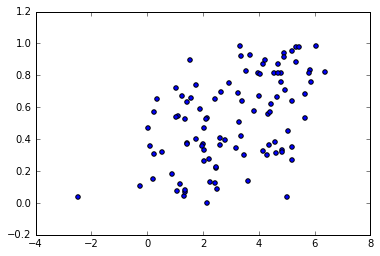

In [3]:
print np.corrcoef(x,y)  # Refer http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.corrcoef.html for more

plt.scatter(x,y)
plt.show()

X and Y in the above case seem to have some form of mild positive correlation, given the value of the Karl Pearson correlation coefficient $R$ is not very high ($R <0.7$, and $R > 0.2$).

### Train-test CV

**Scikit-Learn is a ML package within Python and offers a cross validation module.**

The cross validation process is done to ensure that we have less overfitting or underfitting in our model, and that the bias-variance tradeoff of the model is as good as possible with the given data.

We can use the train_test_split() function from sklearn.cross_validation to do this, as below.

In [4]:
from sklearn.cross_validation import train_test_split

x_tr, x_ts, y_tr, y_ts = train_test_split(pd.DataFrame(x),pd.DataFrame(y), random_state=42) #We have split the data

In [5]:
#Exploring the train and test sets

print x_tr.head()
print y_tr.head()

           x
15  2.594792
40  1.348184
96  4.152863
9   0.353209
72  4.696121
           y
15  0.361847
40  0.067015
96  0.322979
9   0.652005
72  0.816295


Observe that the pairwise rows of data (X and Y pairs) have been randomly combined into the X and Y train and test sets. The data are chosen across the entire range of values.

### Fitting a model to the data

We can fit a model to the data using the linear regression function within sklearn.

The LinearRegression() constructor implements three methods: fit(), predict() and score.
* The fit() method takes the X and Y arguments and constructs a model. It performs the optimization necessary for the coefficients of each X column to be identified.
* The predict() method takes a series of x values, and predicts y values based on the model that's been constructed.
* The score() method calculates a score for the performance of the model with respect to the data available. It takes the x and corresponding y arrays as inputs.


In [6]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(x_tr, y_tr)

print "Score from built in function (training set): ", lr.score(x_tr, y_tr)
print "Score from built in function (test set): ", lr.score(x_ts, y_ts)


Score from built in function (training set):  0.294604116621
Score from built in function (test set):  0.0774044872847


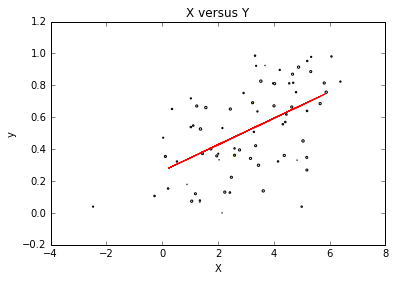

In [7]:
xvals = np.linspace(-2,10,100)
yvals = []
for xval in xvals:
    yvals.append(lr.predict(xval))

plt.scatter(x_tr, y_tr, x_ts, y_ts)
plt.title("X versus Y")
plt.xlabel("X")
plt.ylabel('y')
plt.plot(x_ts,lr.predict(x_ts), "r")


We have constructed a simple least squares linear model in this case, but do we have a model that fits the data well?

We can understand this by calculating the $R^2$ score.

In [8]:
from sklearn.metrics import r2_score

print "R-sq (test):", r2_score(y_ts, lr.predict(x_ts))
print "R-sq (train):", r2_score(y_tr, lr.predict(x_tr))

R-sq (test): 0.0774044872847
R-sq (train): 0.294604116621


Observe that the $R^2$ score calculated here is identical to the score calculated from within the LinearRegression() object (in this case we called it "lr". There is some overlapping functionality in sklearn.

### Interpretation of R-squared value

* With an $R^2$ score of 0.077, this model is only able to explain 7.7% of the variation in Y with respect to X, for the test set. Let's visualize the test set alone to understand this.
* Observe how the $R^2_{train} > R^2_{test}$. This means that we are overfitting the model to the data, and as a result, the model is able to more closely represent the training set, than the test set. The model may therefore be ineffective for representing the test set.



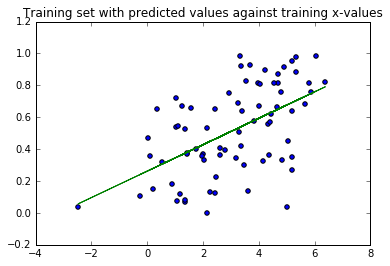

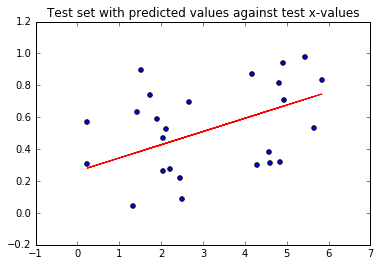

In [20]:
'''xl = np.linspace(0,8,10)
yl = []
for x in xl:
    yl.append(lr.predict(x))
'''
plt.scatter(x_tr, y_tr)
plt.title("Training set with predicted values against training x-values")
plt.plot(x_tr, lr.predict(x_tr), "g")
plt.show()
plt.scatter(x_ts, y_ts)
plt.title("Test set with predicted values against test x-values")
plt.plot(x_ts, lr.predict(x_ts), "r")

For the line of best fit plotted above, we can also see the coefficients, by looking at the "coef\_" object present inside the linear regression object. Similarly, "intercept\_" tells us the intercept value. 

In [21]:
print "Slope: ", lr.coef_, "Intercept: ", lr.intercept_

Slope:  [[ 0.08289305]] Intercept:  [ 0.26188985]


**Note**: The coefficients and intercepts calculated in any linear model will be based on the LinearRegression.fit() method. If x_tr and y_tr have been passed to this method, then the coefficients will be based on these values.

In [24]:
print "Another way of describing the linear model we built is: y = %1.3f x + %1.3f" %(lr.coef_, lr.intercept_)

Another way of describing the linear model we built is: y = 0.083 x + 0.262


### Residuals

* Residuals for any are defined as $y_i - y_m$ where $y_m$ is the model's estimate based on a particular input $x_i$. 
* Larger mean residuals imply greater standard deviation (remember the standard deviation formula).

#### Residuals and the cost function of regression models

In all regression models, the best fit line is found by minimizing a cost function. The cost function is directly related to the mean of the residuals. When the mean value of the residuals is high, cost function is high, and there is room for further minimization / optimization.

Observe large residuals for both the train and test data with respect to the model (red line). This means that we could either collect more data, or try a model with higher order, to simulate more of the variability.


## Regression, Correlation and Causation

* Always bear in mind that correlation between two variables doesn't imply that one could be the cause of the other.
* In cases where the physics of a problem clearly indicate that there is a causal relationship, there is grounds to assume causation from correlation
* Otherwise, we are only evaluating whether two variables can be correlated with each other.


## Examples of false correlation:
![Suprious Correlation \#1](chart.jpeg)
![Suprious Correlation \#2](chart2.jpeg)
